In [41]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [42]:
# print(info_file_list[1])

In [104]:
import csv
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#filenames = find_csv_filenames("export_folder/rit_mismatch_tseob_new/")
filenames = find_csv_filenames("export_folder/sxs_mismatch_tseob_new/")
#filenames = find_csv_filenames("export_folder/sxs_mismatch_seobhm")

data_file_list=[]
info_file_list=[]

for name in filenames:
    # if "rit_mismatch" in name:
    #     data_file_list.append("export_folder/rit_mismatch_tseob_new/"+name)
    if "rit_mismatch" in name:
        data_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)
        #data_file_list.append("export_folder/sxs_mismatch_seobhm/"+name)
        
        

for name in filenames:
    if "model" in name:
        #print(name[23:27])
        #info_file_list.append("export_folder/rit_mismatch_tseob_new/"+name)
        info_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)
        #info_file_list.append("export_folder/sxs_mismatch_seobhm/"+name)

# data_file_list=[data_file,data_file2]

data_list=[]

for i in data_file_list:
    with open(i, newline='') as csvfile:
        data_read = list(csv.reader(csvfile))
        data_list.append(data_read)

info_list=[]
        
for i in info_file_list:
    with open(i, newline='') as csvfile:
        info_read = list(csv.reader(csvfile))
        info_list.append(info_read)

print(len(data_list))
print(len(info_list))

46
49


In [107]:
#"0083" in info_list[5][1][0]
print(info_list[5])
print(data_file_list[1][67:71])

[['name', 'massratio', 'mass1', 'mass2', 'spin1', 'spin2', 'meta_ecc', 'est_ecc', 'f0', 'ecc_bvals', 'f_bvals', 'times[0] (after the sxs 200 cut)'], ['SXS_BBH_1359', '1.000000009338074', '49.999604838', '49.9996043711', '-1.53097683215e-05', '-1.53022326944e-05', '0.2177783', '0.10501035735589581', '9.100101275472621', '0.15211740782637867', '8.728705146435214', '-3153.128358548178']]
1373


here
here
here
here
Problem.11
Problem.11
Problem.11
Problem.11
Problem.11
Problem.11
here
here
here
here
here
here
here
here
here
here
here
Problem.45
Problem.45
Problem.45
Problem.45
Problem.45
Problem.45
here


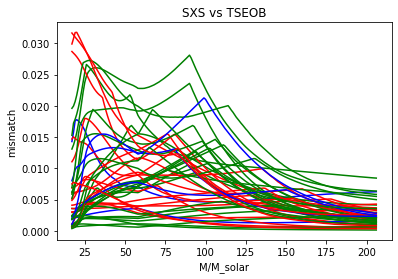

total analyzed:  46
Ecc: red>0.1, 0.1>blue>0.05, green<0.05


In [109]:
import matplotlib.pyplot as plt
import numpy as np

name_list=[]
mismatch_list=[]
mass_list=[]
color_list=[]
for i in range(0,len(data_list)):
    mismatch=[]
    mass=[]
    name=""
    for j in range(1,len(data_list[i])):
        if data_list[i][j][1]!='':
            mismatch_item=float(data_list[i][j][1])
            if mismatch_item>=0.03:
                print("Problem." + str(i))
            mass_item=float(data_list[i][j][0])
            mismatch.append(mismatch_item)
            mass.append(mass_item)
    color="black"
    ecc=-100
    for k in range(0,len(info_list)):
        if str(data_file_list[i][67:71]) in info_list[k][1][0]:
        #if str(data_file_list[i][65:69]) in info_list[k][1][0]:
            ecc=float(info_list[k][1][6])
            if ecc>0.1:
                color="red"
                print("here")
            elif ecc>0.05:
                color="blue"
            else:
                color="green"
            break
    mismatch_list.append(mismatch)
    mass_list.append(mass)
    name_list.append(data_file_list[i])
    color_list.append(color)

    
for i in range(0,len(name_list)):
    plt.plot(mass_list[i],mismatch_list[i],color=color_list[i])
    plt.ylabel("mismatch")
    plt.xlabel("M/M_solar")
    #plt.ylim(0,0.035)
    # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
    # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
#plt.ylim(0,0.1)
plt.title("SXS vs TSEOB")
#plt.title("SXS vs SEOBHM")
plt.show()
print("total analyzed: ", len(name_list))
print("Ecc: red>0.1, 0.1>blue>0.05, green<0.05")



In [49]:
# # print(data_file_list[9])
# print(data_file_list[16])
print(data_file_list[42])
print(data_file_list[45])
# print(data_file_list[42])
# print(data_file_list[45])
#sxs vs seobhm problems: 0179, 1361
#0832 (delete), 1160, 1360, 1361, 1388, 0179

export_folder/sxs_mismatch_seobhm/rit_mismatch_SEOBNREHM_SXS_BBH_1388_massratio_3.0_spin1_0.39_spin2_0.54_eccMeta_0.043.csv
export_folder/sxs_mismatch_seobhm/rit_mismatch_SEOBNREHM_SXS_BBH_0179_massratio_1.5_spin1_0.99_spin2_0.14_eccMeta_0.033.csv


In [46]:
#Make LATEX TABLE
max_mismatch_list = []

for i in range(0,len(name_list)):
    ecc_bvals=-1
    f_bvals=-1
    max_mismatch = -1
    for k in mismatch_list[i]:
        if float(k)>max_mismatch:
            max_mismatch=k
    for j in range(0,len(info_file_list)):
        if name_list[i][67:71] in info_file_list[j]:
            #print(name_list[i][67:71] + " found " + info_file_list[j])
            with open(info_file_list[j], newline='') as csvfile:
                # print(name_list[i][67:71], info_file_list[j])
                info_read = list(csv.reader(csvfile))
                ecc_meta = info_read[1][6]
                ecc_bvals=info_read[1][9]
                f_bvals=info_read[1][10]
                f_bvals_new=fun.f_to_NR(float(f_bvals)/2.,100)*2*np.pi
    result = name_list[i][67:71] + ": " + str(np.round(float(ecc_meta),3)) + " || "+ str(np.round(float(ecc_bvals),5)) + " & " + str(np.round(float(f_bvals_new),5)) + " & " + str(np.round(100*max_mismatch,2)) + "\\\\"
    print(result)
                
                
    





76_m: 0.017 || 4e-05 & 0.02733 & 0.14\\
81_m: 0.011 || 0.00458 & 0.02307 & 0.24\\
73_m: 0.209 || 0.26537 & 0.01562 & 1.96\\
23_m: 0.194 || 0.26832 & 0.01496 & 0.87\\
89_m: 0.06 || 0.05601 & 0.01418 & 1.3\\
59_m: 0.218 || 0.2084 & 0.01752 & 0.76\\
68_m: 0.212 || 0.19932 & 0.01712 & 0.69\\
71_m: 0.109 || 0.08592 & 0.02067 & 1.83\\
49_m: 0.046 || 0.00337 & 0.02476 & 0.54\\
56_m: 0.197 || 0.20545 & 0.01272 & 0.56\\
55_m: 0.068 || 0.04162 & 0.02538 & 1.45\\
08_m: 0.034 || 0.02911 & 0.02013 & 0.34\\
09_m: 0.029 || 0.00796 & 0.0213 & 0.49\\
58_m: 0.219 || 0.1513 & 0.01883 & 0.59\\
82_m: 0.023 || 0.00064 & 0.01797 & 1.41\\
91_m: 0.022 || 0.02107 & 0.01605 & 0.92\\
60_m: 0.364 || 0.38373 & 0.0179 & 1.83\\
20_m: 0.023 || 0.01779 & 0.0184 & 0.55\\
47_m: 0.029 || 0.00556 & 0.03121 & 0.89\\
67_m: 0.213 || 0.18533 & 0.01899 & 0.98\\
80_m: 0.021 || 0.00109 & 0.02799 & 0.14\\
69_m: 0.018 || 0.00237 & 0.01676 & 0.9\\
36_m: 0.124 || 0.07366 & 0.02147 & 0.89\\
66_m: 0.215 || 0.15998 & 0.01716 & 2.37\\
74

In [47]:
name_list=[]
mismatch_list=[]
mass_list=[]
max_mismatch_list=[]
max_mass_list=[]

for i in range(0,len(data_list)):
    mismatch=[]
    mass=[]
    name=""
    bad_acc=0
    max_mismatch=0
    max_mass=0
    for j in range(1,len(data_list[i])):
        if data_list[i][j][1]!='' and float(data_list[i][j][0])<=200.:
            mismatch_item=float(data_list[i][j][1])
            if mismatch_item>=0.1:
                bad_acc+=1
            mass_item=float(data_list[i][j][0])
            mismatch.append(mismatch_item)
            if mismatch_item>max_mismatch:
                max_mismatch=mismatch_item
                max_mass=mass_item
            mass.append(mass_item)
                
    if bad_acc<=1:
        mismatch_list.append(mismatch)
        mass_list.append(mass)
        name_list.append(data_file_list[i])
        #print(max_mismatch)
        max_mismatch_list.append(max_mismatch)
        #print(max_mass)
        max_mass_list.append(max_mass)
        
# print(len(name_list))
# print(len(max_mass_list))
name_array=[]
mismatch_array=[]
mass_array=[]
ecc_meta_array=[]
mass_ratio_array=[]
ecc_est_array=[]
ecc_bvals_array=[]
f_bvals_array=[]
spin_array=[]

# print("   name      |max mismatch| max mismatch mass |meta eccentricity| mass ratio | ecc est | ecc bvals | f bvals")
# for i in range(0,len(name_list)):
#     name = name_list[i]
#     name = name[59:72]
#     name_array.append(name)
#     mismatch_array.append(np.around(max_mismatch_list[i],4))
#     mass_array.append(max_mass_list[i])
#     #Get meta data
#     ecc=-1
#     mass_ratio=-1
#     #CHANGE THIS
#     for j in ecc_cases:
#         # print(j[0])
#         # print(name_list[i])
#         if  j[0] in name_list[i]:
#             ritwavename=str(j[0])
#             system_type=j[1]
#             ecc = j[2]
#             mass_ratio=j[3]
#             final_mass=j[4]
#             final_chi=j[5]
#             initial_bh_chi1z=j[6]
#             initial_bh_chi2z=j[7]
#             initial_freq=float(j[8])
            
#     #spin calculation
#     # goal: spin1*m1+spin2*m2 normalized 
#     # m1/m2=Q and m1+m2=1
#     # m1=Q/(1+Q) and m2=1/(1+Q)
    
#     #looks good
#     m1=float(mass_ratio)/(float(mass_ratio)+1)
#     m2=1/(float(mass_ratio)+1)
#     spin_array.append(m1*float(initial_bh_chi1z)+m2*float(initial_bh_chi2z))  
#     ecc_meta_array.append(ecc)
#     mass_ratio_array.append(np.around(float(mass_ratio),3))
#     #Get bvals
#     for j in info_file_list:
#         if name in j:
#             with open(j, newline='') as csvfile:
#                 info_read = list(csv.reader(csvfile))
#                 ecc_est=info_read[1][7]
#                 ecc_bvals=info_read[1][9]
#                 f_bvals=info_read[1][10]
                
#                 ecc_est_array.append(np.round(float(ecc_est),4))
#                 ecc_bvals_array.append(np.round(float(ecc_bvals),4))
#                 f_bvals_array.append(np.round(float(f_bvals),4))
                
    
#     #print(name_array[i], "   ", mismatch_array[i], "     ",  mass_array[i], "             ", 
#           # ecc_meta_array[i], "          ", mass_ratio_array[i], "      ",ecc_est_array[i],  "    ",
#           # ecc_bvals_array[i], "    " , f_bvals_array[i])


    

Make a table

In [40]:
#MASS RATIO ECCENTRICITY PLOT
print("total data points" + str(len(name_array)))
plot_data=[]
color_array=[]
for i in range(0,len(name_array)):
    if mismatch_array[i]>=0.1:
        c='red'
    elif mismatch_array[i]>=0.05:
        c='blue'
    elif mismatch_array[i]>=0.01:
        c='green'
    else:
        c='black'
    plot_data.append([mass_ratio_array[i],float(ecc_bvals_array[i])])
    color_array.append(c)
plot_data=np.array(plot_data)

plt.scatter(plot_data[:,0],plot_data[:,1],s=50,color=color_array)
plt.xlabel("mass ratio Q")
plt.ylabel("Bvals eccentricity")
plt.title("Max mismatch color: red>0.1, blue 0.05-0.1, green 0.01-0.05, black<0.01")
plt.show()
print("low mass ratio means higher mismatch?")

total data points0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
#SPIN ECCENTRICITY PLOT

#MASS RATIO ECCENTRICITY PLOT
print("total data points" + str(len(name_array)))
plot_data=[]
color_array=[]
for i in range(0,len(name_array)):
    if mismatch_array[i]>=0.1:
        c='red'
    elif mismatch_array[i]>=0.05:
        c='blue'
    elif mismatch_array[i]>=0.01:
        c='green'
    else:
        c='black'
    plot_data.append([spin_array[i],float(ecc_bvals_array[i])])
    color_array.append(c)
plot_data=np.array(plot_data)

plt.scatter(plot_data[:,0],plot_data[:,1],s=50,color=color_array)
plt.xlabel("Spin (spin1*m1+spin2*m2, mass normalized)")
plt.ylabel("Bvals eccentricity")
plt.title("Max mismatch color: red>0.1, blue 0.05-0.1, green 0.01-0.05, black<0.01")
plt.show()
print("high spin means high mismatch!")